In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

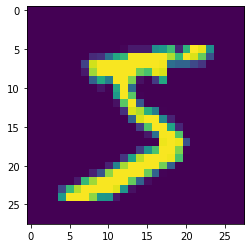

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [7]:
X_train[0].shape

(28, 28)

In [8]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28, 28]))
encoder.add(Dense(units=400, activation='relu'))
encoder.add(Dense(units=200, activation='relu'))
encoder.add(Dense(units=100, activation='relu'))
encoder.add(Dense(units=50, activation='relu'))
encoder.add(Dense(units=25, activation='relu'))
            

decoder = Sequential()
decoder.add(Dense(units=50, activation='relu', input_shape=[25]))
decoder.add(Dense(units=100, activation='relu'))
decoder.add(Dense(units=200, activation='relu'))
decoder.add(Dense(units=400, activation='relu'))
decoder.add(Dense(units=784, activation='sigmoid'))
decoder.add(Reshape(target_shape=[28,28]))

In [9]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss='binary_crossentropy', 
                    optimizer=SGD(lr=1.5),
                    metrics=['accuracy'])

In [10]:
autoencoder.fit(X_train, X_train, epochs=5,
                validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 169us/sample - loss: 0.2510 - accuracy: 0.7910 - val_loss: 0.2168 - val_accuracy: 0.7864
Epoch 2/5
60000/60000 [==============================] - 9s 158us/sample - loss: 0.1979 - accuracy: 0.7961 - val_loss: 0.1735 - val_accuracy: 0.7983
Epoch 3/5
60000/60000 [==============================] - 10s 159us/sample - loss: 0.1649 - accuracy: 0.8015 - val_loss: 0.1559 - val_accuracy: 0.8028
Epoch 4/5
60000/60000 [==============================] - 10s 160us/sample - loss: 0.1499 - accuracy: 0.8040 - val_loss: 0.1438 - val_accuracy: 0.8044
Epoch 5/5
60000/60000 [==============================] - 10s 161us/sample - loss: 0.1432 - accuracy: 0.8050 - val_loss: 0.1452 - val_accuracy: 0.8009


In [11]:
passed_images = autoencoder.predict(X_test[:10])

Original Image


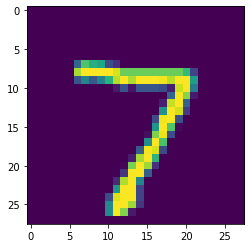

Attempted Reconstruction


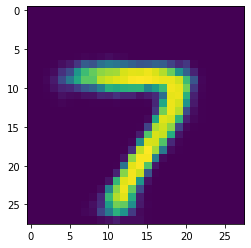

In [12]:
n = 0
print("Original Image")
plt.imshow(X_test[n])
plt.show()
print('Attempted Reconstruction')
plt.imshow(passed_images[n])

In [13]:
from tensorflow.keras.layers import GaussianNoise

In [14]:
sample = GaussianNoise(0.2)

In [15]:
noisey = sample(X_test[:10], training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Original Image


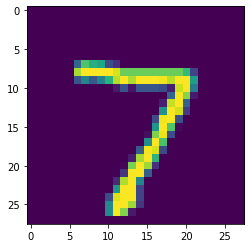

Noisey Image


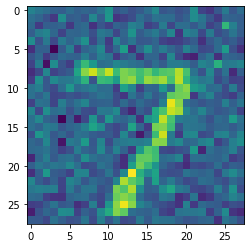

In [16]:
n = 0
n = 0
print("Original Image")
plt.imshow(X_test[n])
plt.show()
print('Noisey Image')
plt.imshow(noisey[n]) 

In [17]:
import tensorflow as tf

In [18]:
tf.random.set_seed(101)
np.random.seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28, 28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(units=400, activation='relu'))
encoder.add(Dense(units=200, activation='relu'))
encoder.add(Dense(units=100, activation='relu'))
encoder.add(Dense(units=50, activation='relu'))
encoder.add(Dense(units=25, activation='relu'))


decoder = Sequential()
decoder.add(Dense(units=50, activation='relu', input_shape=[25]))
decoder.add(Dense(units=100, activation='relu'))
decoder.add(Dense(units=200, activation='relu'))
decoder.add(Dense(units=400, activation='relu'))
decoder.add(Dense(units=784, activation='sigmoid'))
decoder.add(Reshape(target_shape=[28,28]))

In [19]:
noise_remover = Sequential([encoder, decoder])

In [20]:
noise_remover.compile(loss='binary_crossentropy', 
                    optimizer='adam',
                    metrics=['accuracy'])

In [21]:
noise_remover.fit(X_train, X_train, epochs=8)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 11s 188us/sample - loss: 0.1684 - accuracy: 0.8013
Epoch 2/8
60000/60000 [==============================] - 11s 182us/sample - loss: 0.1296 - accuracy: 0.8080
Epoch 3/8
60000/60000 [==============================] - 11s 185us/sample - loss: 0.1202 - accuracy: 0.8097
Epoch 4/8
60000/60000 [==============================] - 12s 192us/sample - loss: 0.1149 - accuracy: 0.8105
Epoch 5/8
60000/60000 [==============================] - 11s 188us/sample - loss: 0.1114 - accuracy: 0.8111
Epoch 6/8
60000/60000 [==============================] - 11s 188us/sample - loss: 0.1092 - accuracy: 0.8114
Epoch 7/8
60000/60000 [==============================] - 11s 190us/sample - loss: 0.1076 - accuracy: 0.8117
Epoch 8/8
60000/60000 [==============================] - 12s 194us/sample - loss: 0.1060 - accuracy: 0.8119


In [22]:
ten_noisey_images = sample(X_test[:10], training=True)

In [24]:
denoised = noise_remover(ten_noisey_images)

Original


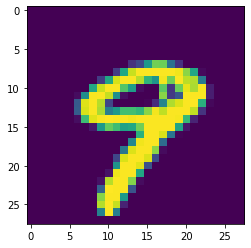

Noise Added


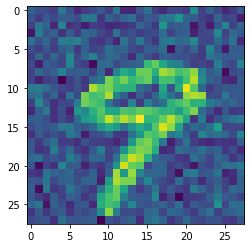

After Noise Removal


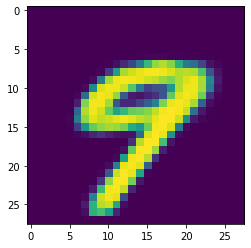

In [25]:
n = 9
print('Original')
plt.imshow(X_test[n])
plt.show()
print('Noise Added')
plt.imshow(noisey[n])
plt.show()
print('After Noise Removal')
plt.imshow(denoised[n])
plt.show()